# Corona Growth Patterns in Critical Countries

I think it is important for everyone to understand the nature of the growth patterns of pandemics. There is an excellent Youtube video from [3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw) that offers a great explanation.

### Understanding Growth Video Link

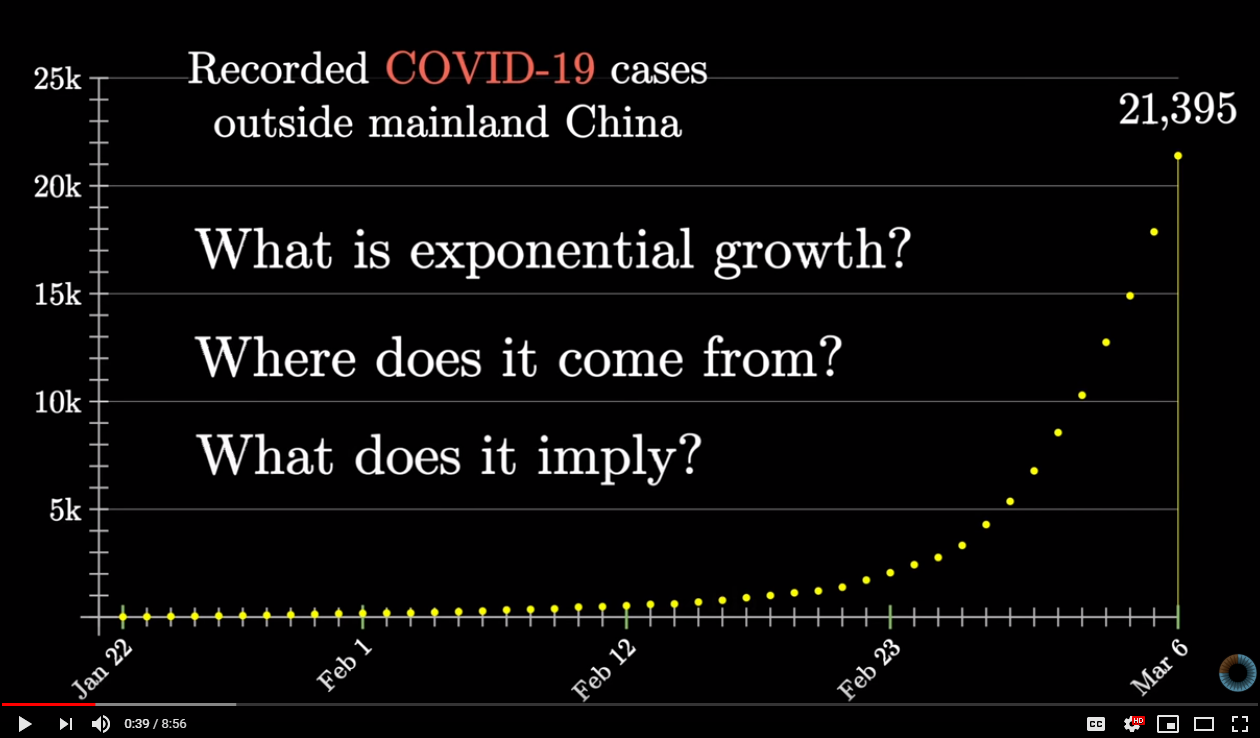

https://www.youtube.com/watch?v=Kas0tIxDvrg&t=35s

In [ ]:
#import IPython
#IPython.display.IFrame(<iframe width="650" height="400" frameborder="0" scrolling="no" marginheight="0" marginwidth="0" title="2019-nCoV" src="/gisanddata.maps.arcgis.com/apps/Embed/index.html?webmap=14aa9e5660cf42b5b4b546dec6ceec7c&extent=77.3846,11.535,163.5174,52.8632&zoom=true&previewImage=false&scale=true&disable_scroll=true&theme=light"></iframe>)

In [ ]:
from IPython.display import HTML

HTML('<div style="position:relative;height:0;padding-bottom:56.25%"><iframe src="https://www.youtube.com/embed/jmHbS8z57yI?ecver=2" width="640" height="360" frameborder="0" style="position:absolute;width:100%;height:100%;left:0" allowfullscreen></iframe></div>')

# Purpose of This Document
The purpose of this notebook is to provide tracking of the COVID-19 virus in specific countries and regions that have seen severe growth rates. Currently, the following countries and regions are included:
* China
* All China excluding the original Hubei province
* Rest of the world
* United States
* Italy
* Iran
* Spain

There are two phases to the growth rate, an exponential phase, and then a flattening, downward turning of the curve. This is a sigmoid curve. The sigmoid curve is include only in the cases where the inflection point has been crossed (as of 3/15/20, all China and remainder of China excluding Hubei. 

Hopefully, the exponential graphs will help us define the inflection point for each separate population. 

## Observation Log

* On 3/18, South Korea was moved to the sigmoid tracking group. The sigmoid curves now converge.
*          Italy's exponential curve began to tilt slightly. That may signal the start of an inflection point.
*          Italy's mortality rate is extremely high and still climbing.
*          Washington State also seems to be flattening.

## Change History

* 2020-03-18 - Addressed a problem with some of the curve fitting not converging. Because some of the countries, like the US, had a long period of days with no increases of cases, the tracking start date.
* 2020-03-18 - Added US "hot" states, NY, CA, and WA. Also added Germany, which has shown rapid recent growth.
*   -- planned -- extract all growth rates into a separate table for comparison


## About Coronavirus

* Coronaviruses are **zoonotic** viruses (means transmitted between animals and people).  
* Symptoms include from fever, cough, respiratory symptoms, and breathing difficulties. 
* In severe cases, it can cause pneumonia, severe acute respiratory syndrome (SARS), kidney failure and even death.
* Coronaviruses are also asymptomatic, means a person can be a carrier for the infection but experiences no symptoms

## Novel coronavirus (nCoV)
* A **novel coronavirus (nCoV)** is a new strain that has not been previously identified in humans.

## COVID-19 (Corona Virus Disease 2019)
* Caused by a **SARS-COV-2** corona virus.  
* First identified in **Wuhan, Hubei, China**. Earliest reported symptoms reported in **November 2019**. 
* First cases were linked to contact with the Huanan Seafood Wholesale Market, which sold live animals. 
* On 30 January the WHO declared the outbreak to be a Public Health Emergency of International Concern 

# Acknowledgements

This effort was inspired by an excellent Youtube video from [3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)

* Video - https://www.youtube.com/watch?v=Kas0tIxDvrg&t=35s 
* Starting kernel - https://www.kaggle.com/imdevskp/covid-19-analysis-viz-prediction-comparisons
* https://github.com/CSSEGISandData/COVID-19
* https://arxiv.org/ftp/arxiv/papers/2003/2003.05681.pdf



# Libraries

### Install

In [ ]:
# install calmap
! pip install calmap

### Import Libraries

In [ ]:
# essential libraries
import json
import random
from urllib.request import urlopen

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import calmap
import folium

# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# html embedding
from IPython.display import Javascript
from IPython.core.display import display
from IPython.core.display import HTML

# Dataset

In [ ]:
# list files
#!ls ../input/corona-virus-report

In [ ]:
# importing datasets
full_table = pd.read_csv('../input/corona-virus-report/covid_19_clean_complete.csv', 
                         parse_dates=['Date'])


## Most Recent Update

In [ ]:
print ('Last update of this dataset was ' + str(full_table.loc[len(full_table)-1]['Date']))

In [ ]:
full_table.head(10)

In [ ]:
# checking for missing value
 full_table.isna().sum()

# Preprocessing

In [ ]:
### Cleaning Data

# cases 
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

# replacing Mainland china with just China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
full_table[['Province/State']] = full_table[['Province/State']].fillna('')
full_table[cases] = full_table[cases].fillna(0)

In [ ]:
# cases in the ships
ship = full_table[full_table['Province/State'].str.contains('Grand Princess')|full_table['Country/Region'].str.contains('Cruise Ship')]

# china and the row
china = full_table[full_table['Country/Region']=='China']
us = full_table[full_table['Country/Region']=='US']
skorea  = full_table[full_table['Country/Region']=='Korea, South']
italy = full_table[full_table['Country/Region']=='Italy']
iran = full_table[full_table['Country/Region']=='Iran']
spain = full_table[full_table['Country/Region']=='Spain']
row = full_table[full_table['Country/Region']!='China']
#rest of China
roc = china[china['Province/State'] != 'Hubei']
germany = full_table[full_table['Country/Region']=='Germany']
ca = us[us['Province/State'] == 'California']
ny = us[us['Province/State'] == 'New York']
wa = us[us['Province/State'] == 'Washington']

# latest
full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()
china_latest = full_latest[full_latest['Country/Region']=='China']
row_latest = full_latest[full_latest['Country/Region']!='China']

# latest condensed
full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
china_latest_grouped = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [ ]:
def country_info (country, dt, incl_state=False):
    
    if incl_state:
        print ('Rates for states/province in ' + pd.unique(country['Country/Region']))
        by_state = country.groupby(['Date', 'Province/State'])['Date','Confirmed', 'Deaths', 'Recovered', 'Active'].max()
        by_state.active = by_state
        by_state = by_state.sort_values(by='Confirmed', ascending=False)
        by_state.reset_index(drop=True)
        by_state.style.background_gradient(cmap='Pastel1_r')
        print (by_state)
    by_date = country.groupby (['Date'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()
    by_date = by_date.reset_index()
    by_date = by_date[by_date.Date>=dt]
    #print (len(by_date))

    print ('Rates for country/region : ' + pd.unique(country['Country/Region']))

    print (by_date)
    
    
    # Add need fields
    
    by_date ['prior_confirmed'] = 0
    by_date ['prior_deaths'] = 0
    by_date ['prior_recovered'] = 0
    by_date ['daily_confirmed'] = 0
    by_date ['daily_deaths'] = 0
    by_date ['daily_recovered'] = 0
    p_confirmed = 0
    p_deaths = 0
    p_recovered = 0
   
    for i, row in by_date.iterrows():
        #print (by_date.loc[i])
        by_date.loc[i,'prior_confirmed'] = p_confirmed 
        by_date.loc[i,'prior_deaths'] = p_deaths 
        by_date.loc[i,'prior_recovered'] = p_recovered
        p_confirmed = by_date.loc[i,'Confirmed']
        p_deaths = by_date.loc[i,'Deaths']
        p_recovered = by_date.loc[i,'Recovered']
        
        
    
    by_date ['delta_confirmed'] = by_date.Confirmed - by_date.prior_confirmed
    by_date ['delta_deaths'] = by_date.Deaths - by_date.prior_deaths
    by_date ['delta_recovered'] = by_date.Recovered - by_date.prior_recovered
    
    return by_date

us_by_date = country_info(us,'2020-03-04', False)
china_by_date = country_info(china,'2020-01-01', False)
italy_by_date = country_info(italy,'2020-02-20',)
skorea_by_date = country_info(skorea,'2020-02-17')
iran_by_date = country_info(iran,'2020-02-23')
spain_by_date = country_info(spain,'2020-02-23')
row['Country/Region'] = 'Rest of World'
row_by_date = country_info(row,'2020-01-01')
roc_by_date = country_info (roc, '2020-01-01')
germany_by_date = country_info (germany, '2020-02-23')
ca['Country/Region'] = 'California'
ny['Country/Region'] = 'New York'
wa['Country/Region'] = 'Washington'
ca_by_state = country_info(ca,'2020-03-09')
ny_by_state = country_info(ny,'2020-03-09')
wa_by_state = country_info(wa,'2020-03-09')





In [ ]:
dict = {'United States':us_by_date,
        'China':china_by_date,
        'Italy':italy_by_date,
        'California':ca_by_state,
        'Washington':wa_by_state,
        'New York':ny_by_state,
        'Iran':iran_by_date,
        'South Korea':skorea_by_date,
        'Spain':spain_by_date,
        'Germany':germany_by_date,
        'Rest of world -w/o China':row_by_date,
        'Rest of China w/o Hubei': roc_by_date,
        }


## Examining the Growth Curves

These distributions start off exponentially, but eventually become a logistic curve. We can plot them both ways, and then fit a linear regression to the log of the value to determine the rate.

First we look at mortality curves. The trend to what for is an increasing mortality curve. This means that medical treatments are not controlling the virus well. This is true in Italy, which has an older population and seemed to be slow to respond in social distancing efforts. Compare Italy to South Korea, which had an agressive testing and treatment program.

### What these curves show

There are four groups of curves shown. They show:

* Death and recovery rates for each region - these are on a log scale and show rates of death and recovery per confirmed cases 
* Exponential growth for each region - there are separate plots for confirmed cases, deaths, and recovered
* Sigmoid growth curves - these are for only the countries that have reached an inflection point
* Gaussian curves - these are an approximation of the derivative of the sigmoid curve, which is the number of daily new cases over time 

The growth and normal curves also have the coefficents and errors for each coeffients. The second coefficent is the growth rate.

In [ ]:
def plots_by_country (country, country_name):

    temp = country

    # adding two more columns
    temp['No. of Deaths to 100 Confirmed Cases'] = round(temp['Deaths']/temp['Confirmed'], 3)*100
    temp['No. of Recovered to 100 Confirmed Cases'] = round(temp['Recovered']/temp['Confirmed'], 3)*100
    # temp['No. of Recovered to 1 Death Case'] = round(temp['Recovered']/temp['Deaths'], 3)
    #print (temp)

    
    #print (temp.iloc[13]['Date'])
    last_date = temp.iloc[len(temp)-1]['Date']
    death_rate = temp[temp.Date ==last_date]['No. of Deaths to 100 Confirmed Cases']
    recovered_rate = temp[temp.Date ==last_date]['No. of Recovered to 100 Confirmed Cases']
    temp = temp.melt(id_vars='Date', value_vars=['No. of Deaths to 100 Confirmed Cases', 'No. of Recovered to 100 Confirmed Cases'], 
                     var_name='Ratio', value_name='Value')

    #str(full_table.loc[len(full_table)-1]['Date'])
    fig = px.line(temp, x="Date", y="Value", color='Ratio', log_y=True, 
                  title=country_name + ' Recovery and Mortality Rate Over The Time', color_discrete_sequence=[dth, rec])
    fig.show()
    return death_rate, recovered_rate
        
rates = []
for key, value in dict.items():
    death_rate, recovered_rate  = plots_by_country (value,key)
    rates.append ([key,np.float(death_rate),np.float(recovered_rate)]) 
    

In [ ]:
#rates


Next, let's review some of the grow curves.



In [ ]:
import pylab
from scipy.optimize import curve_fit

def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y

def exp (x,a,b):
    y = a* np.exp(x*b)
    return y

def gaussian(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
   

def plot_curve_fit (f, country, attribute, title, normalize = False, gauss = False):
    #country = country[10:]
    fit_good = True
    ydata = country[attribute]
    #ydata = np.array(ydata)
    xdata = range(len(ydata))
    mu = np.mean(ydata)
    sigma = np.std(ydata)
    ymax = np.max(ydata)    
    if normalize:
        ydata_norm = ydata/ymax
    else:
        ydata_norm = ydata
    #f = sigmoid
    try:
        if gauss: # pass the mean and stddev
            popt, pcov = curve_fit(f, xdata, ydata_norm, p0 = [1, mu, sigma])
        else:    
            popt, pcov = curve_fit(f, xdata, ydata_norm,)
    except RuntimeError:
        print ('Exception - RuntimeError - could not fit curve')
        fit_good = False
    else:

        fit_good = True
        
    if fit_good:
        print (key + ' ------- Coefficients for equation are ' + str(popt))
        print ('Mean error for each coefficient: ' + str(np.sqrt(np.diag(pcov))/popt))
    else:
        print (key + ' -- Could not resolve coefficients ---')
    x = np.linspace(-1, len(ydata), 100)
    if fit_good:
        y = f(x, *popt)
        if normalize:
            y = y * ymax
    
    pylab.figure(figsize=(15,8)) 
    #pylab.grid(True, linestyle='-', color='0.75')
    pylab.plot(xdata, ydata, 'o', label=attribute)
    if fit_good:
        pylab.plot(x,y, label='fit')
    pylab.ylim(0, ymax*1.05)
    pylab.legend(loc='best')
    pylab.xlabel('Days Since Start')
    pylab.ylabel('Number of ' + attribute)
    pylab.title(title + attribute, size = 25)
    pylab.show()


In [ ]:
dict_exp = {'United States':us_by_date,
        'California':ca_by_state,    
        'New York':ny_by_state,   
        'Washington':wa_by_state,               
        'Italy':italy_by_date,
        'Iran':iran_by_date,
        'South Korea':skorea_by_date,
        'Spain':spain_by_date,
        'Germany':germany_by_date,    
        'Rest of world -w/o China':row_by_date,

        }
dict_sigmoid = {
        'China':china_by_date,
        'South Korea': skorea_by_date,
        'Rest of China w/o Hubei': roc_by_date,
}


## Exponential Growth Curves

In [ ]:
for key, value in dict_exp.items():
    plot_curve_fit (exp, value, 'Confirmed', key + ' - Growth Curve for ',False)
    plot_curve_fit (exp, value, 'Deaths', key + ' - Growth Curve for ',False)
    plot_curve_fit (exp, value, 'Recovered', key + ' - Growth Curve for ',False)

Based on the above curves, it seems that South Korea's growth rate has reached an inflection point. The sigmoid function does not yet fit, but it should in a few days. For now we will examine China.

## Sigmoid Growth Curves

China and the subset of China outside Hubei now have resonable sigmoid growth curves. Here are their plots.

In [ ]:
for key, value in dict_sigmoid.items():
    plot_curve_fit (sigmoid, value, 'Confirmed', key + ' - Growth Curve for ',True)
    plot_curve_fit (sigmoid, value, 'Deaths', key + ' - Growth Curve for ',True)
    plot_curve_fit (sigmoid, value, 'Recovered', key + ' - Growth Curve for ',True)

## Gaussian Approximation of Active Cases

The active cases should fairly clossly resemble a Gaussian distribution. While the derivate of a sigmoid function is not the Gaussian function, a Gaussian distribution is a close approximation.

In [ ]:
plot_curve_fit (gaussian, roc_by_date, 'Active', 'China w/o Hubei' + ' - Curve for Cases ',False)
plot_curve_fit (gaussian, china_by_date, 'Active', 'China' + ' - Curve for Cases ',False)
plot_curve_fit (gaussian, skorea_by_date, 'Active', 'South Korea' + ' - Curve for Cases ',False)

# Analysis on similar epidemics

https://www.kaggle.com/imdevskp/mers-outbreak-analysis  
https://www.kaggle.com/imdevskp/sars-2003-outbreak-analysis  
https://www.kaggle.com/imdevskp/western-africa-ebola-outbreak-analysis
